# TREES


## invert_binary_tree_iterative.py


In [2]:
# TreeNode and inversion code
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

    def __repr__(self):
        return f"{self.val}"


def invert_binary_tree_iterative(root: TreeNode) -> TreeNode:
    if not root:
        return None
    stack = [root]
    while stack:
        node = stack.pop()
        # swap left, right
        node.left, node.right = node.right, node.left
        if node.left:
            stack.append(node.left)
        if node.right:
            stack.append(node.right)
    return root

In [3]:
def build_binary_tree(values):
    """
    Build a binary tree from a list of values in level order.
    None values represent empty nodes.
    """
    if not values or values[0] is None:
        return None

    root = TreeNode(values[0])
    queue = [root]
    i = 1

    while queue and i < len(values):
        node = queue.pop(0)

        # Left child
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            queue.append(node.left)
        i += 1

        # Right child
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            queue.append(node.right)
        i += 1

    return root


tree_list = [5, 1, 8, 7, 6, None, 4]
root = build_binary_tree(tree_list)

invert_binary_tree_iterative(root)

5

## invert_binary_tree_recursive.py


In [23]:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None


def invert_binary_tree_recursive(root: TreeNode):
    if not root:
        return None

    root.left, root.right = root.right, root.left
    invert_binary_tree_recursive(root.left)
    invert_binary_tree_recursive(root.right)
    return root


# Create and print the tree
tree_list = [5, 1, 8, 7, 6, None, 4]
root = build_binary_tree(tree_list)

invert_binary_tree_iterative(root)

## balanced_binary_tree_validation.py


In [24]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [25]:
def balanced_binary_tree_validation(root: TreeNode) -> bool:
    return get_height_imbalance(root) != -1


def get_height_imbalance(node: TreeNode) -> int:
    if not node:
        return 0

    left_height = get_height_imbalance(node.left)
    right_height = get_height_imbalance(node.right)

    if left_height == -1 or right_height == -1:
        return -1

    if abs(left_height - right_height) > 1:
        return -1

    return 1 + max(left_height, right_height)

In [26]:
tree_list = [5, 1, 8, 7, 6, None, 4]
root = build_binary_tree(tree_list)

balanced_binary_tree_validation(root)

True

## rightmost_nodes_of_a_binary_tree.py


In [27]:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

In [28]:
from typing import List
from collections import deque


def rightmost_nodes_of_a_binary_tree(root: TreeNode) -> List[int]:
    if not root:
        return []
    res = []
    queue = deque([root])
    while queue:
        level_size = len(queue)
        for i in range(level_size):
            node = queue.popleft()
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

            if i == level_size - 1:
                res.append(node.val)

    return res

## widest_binary_tree_level.py


In [29]:
from collections import deque


class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

    def expr(self):
        return str(self.val)

In [30]:
import matplotlib.pyplot as plt
import networkx as nx


def build_binary_tree(values):
    if not values or values[0] is None:
        return None

    root = TreeNode(values[0])
    queue = [root]
    i = 1

    while queue and i < len(values):
        node = queue.pop(0)

        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            queue.append(node.left)
        i += 1

        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            queue.append(node.right)
        i += 1

    return root


def add_edges(graph, node, pos, x=0, y=0, level=1, dx=1.0):
    if node:
        graph.add_node(node.val)
        pos[node.val] = (x, y)
        if node.left:
            graph.add_edge(node.val, node.left.val)
            add_edges(graph, node.left, pos, x - dx, y - 1, level + 1, dx / 2)
        if node.right:
            graph.add_edge(node.val, node.right.val)
            add_edges(graph, node.right, pos, x + dx, y - 1, level + 1, dx / 2)

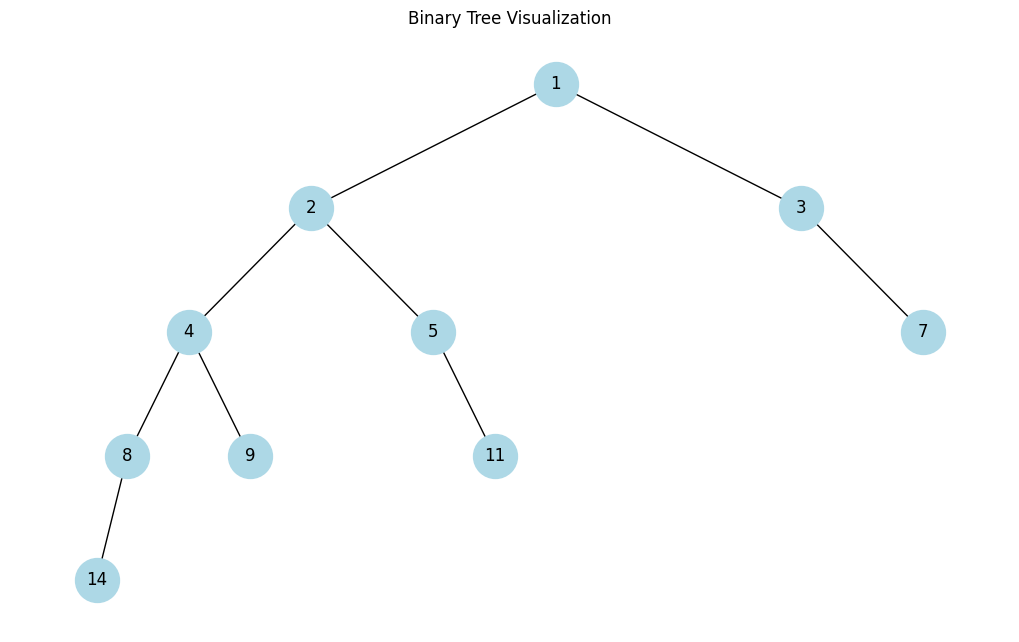

In [31]:
tree_list = [1, 2, 3, 4, 5, None, 7, 8, 9, None, 11, None, None, 14]
root = build_binary_tree(values=tree_list)

G = nx.DiGraph()
pos = {}
add_edges(G, root, pos)

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, arrows=False, node_size=1000, node_color="lightblue")
plt.title("Binary Tree Visualization")
plt.show()

In [32]:
def widest_binary_tree_level(root: TreeNode) -> int:
    if not root:
        return 0
    max_width = 0
    queue = deque([(root, 0)])  # (node, index) pair

    while queue:
        level_size = len(queue)
        leftmost_index = queue[0][1]  # -> (_, index)
        rightmost_index = leftmost_index  # initially same as left

        for _ in range(level_size):
            node, i = queue.popleft()
            if node.left:
                queue.append((node.left, 2 * i + 1))
            if node.right:
                queue.append((node.right), 2 * i + 2)
            rightmost_index = i
        max_width = max(max_width, rightmost_index - leftmost_index + 1)
    return max_width

## binary_search_tree_validation.py


In [33]:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None


def binary_search_tree_validation(root: TreeNode) -> bool:
    return is_within_bounds(root, float("-inf"), float("inf"))


def is_within_bounds(node: TreeNode, lower_bound: int, upper_bound: int) -> bool:
    if not node:
        return True

    if not lower_bound < node.val < upper_bound:
        return False

    if not is_within_bounds(node.left, lower_bound, node.val):
        return False

    return is_within_bounds(node.right, node.val, upper_bound)

## lowest_common_ancestor.py


In [34]:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

    def __repr__(self):
        return f"TreeNode({self.val})"


def build_tree(nodes):
    """Build binary tree from a level-order array representation"""
    if not nodes or nodes[0] is None:
        return None

    # create root node
    root = TreeNode(nodes[0])
    queue = [root]
    i = 1

    # Process the rest of the nodes
    while queue and i < len(nodes):
        node = queue.pop(0)

        # Add left child
        if i < len(nodes) and nodes[i] is not None:
            node.left = TreeNode(nodes[i])
            queue.append(node.left)
        i += 1

        # Add right child
        if i < len(nodes) and nodes[i] is not None:
            node.right = TreeNode(nodes[i])
            queue.append(node.right)
        i += 1

    return root

In [42]:
def find_node(root, target_val):
    """Find the node with the specified value in the tree."""
    if not root:
        return None

    if root.val == target_val:
        return root

    # Check left and right subtrees
    left_result = find_node(root.left, target_val)
    if left_result:
        return left_result

    return find_node(root.right, target_val)

In [43]:
def lowest_common_ancestor(root, p, q):
    """Find the lowest common ancestor of nodes p and q."""
    result = [None]  # Use a list to store our result

    def dfs(node):
        if not node:
            return False

        node_is_p_or_q = node == p or node == q
        left_contains_p_or_q = dfs(node.left)
        right_contains_p_or_q = dfs(node.right)

        if node_is_p_or_q + left_contains_p_or_q + right_contains_p_or_q == 2:
            result[0] = node

        return node_is_p_or_q or left_contains_p_or_q or right_contains_p_or_q

    dfs(root)
    return result[0]

In [44]:
# Test with the example
nodes = [1, 2, 3, 4, 5, 6, 7, None, None, None, None, 8, 9]
root = build_tree(nodes)

# Find the nodes with values 8 and 7
p = find_node(root, 8)
q = find_node(root, 7)

# Find the LCA
lca = lowest_common_ancestor(root, p, q)
print(f"The LCA of nodes {p} and {q} is: {lca}")

The LCA of nodes TreeNode(8) and TreeNode(7) is: TreeNode(3)


## build_binary_tree.py


In [9]:
from typing import List, Optional


class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

In [15]:
def build_binary_tree(preorder: List[int], inorder: List[int]) -> Optional[TreeNode]:
    pass

## maximum_path_sum.py


## binary_tree_symmetry.py


## binary_tree_columns.py


## kth_smallest_number_in_BST_iterative.py


## kth_smallest_number_in_BST_recursive.py


## serialize_and_deserialize_a_binary_tree.py
